### Let's import libraries that will be used later

In [1]:
import numpy as np 
np.random.seed(42)
import pandas as pd

import os
print(os.listdir("../input"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)

['clients_new.txt', 'clients_new1.txt', 'clients.csv', 'is_payroll.txt', 'Dataset_BNB.txt', 'Dataset_BNB_20180710.txt', 'MCCs.csv']


### There will be used the following datasets: 
- clients.csv - data, aggregated by CLIENT_ID with extracted features
- clients_new1.txt - percentage of expenses by groups for each client

In [ ]:
client_data = pd.read_csv('../input/clients.csv',encoding='utf-8')

In [5]:
client_data.head().T

0             1             2             3             4
CLIENT_ID                                           9696.000000  10929.000000  11491.000000  11614.000000  11695.000000
SUM_AMOUNT                                         22592.730000  31649.230000   4971.170000   7390.290000    470.150000
MEAN_AMOUNT                                          100.412133    372.343882    150.641515     63.164872    235.075000
MAX_CARD_LVL                                           3.000000      6.000000      1.000000      4.000000      2.000000
GENDER                                                 0.000000      1.000000      0.000000      1.000000      0.000000
MAX_AMOUNT                                          1470.000000   3000.000000    500.000000   1250.000000    468.760000
NUM_TRANS                                            225.000000     85.000000     33.000000    117.000000      2.000000
NUM_COUNTRIES                                          1.000000      1.000000      1.000000      4.000000      1.000000
NUM_FOREIGN_COUTRIES                                   0.000000      0.000000      0.000000      3.000000      0.000000
CLIENT_REGION                                          0.000000      4.000000      0.000000      0.000000      0.000000
IS_ONLY_FOREIGN                                        0.000000      0.000000      0.000000      0.000000      0.000000
SUM_AMOUNT_FOREIGN                                     0.000000      0.000000      0.000000    473.820000      0.000000
SUM_AMOUNT_BLR                                     22592.730000  31649.230000   4971.170000   6916.470000    470.150000
SUM_AMOUNT_FOREIGN_PERCENTAGE                          0.000000      0.000000      0.000000      0.064114      0.000000
SUM_AMOUNT_BLR_PERCENTAGE                              1.000000      1.000000      1.000000      0.935886      1.000000
NUM_CONTRACTS                                          1.000000      2.000000      1.000000      1.000000      1.000000
NUM_CARDS                                              2.000000      2.000000      1.000000      1.000000      1.000000
HAS_CREDIT_CARD                                        0.000000      1.000000      0.000000      0.000000      0.000000
SUM_AMOUNT_CREDIT_CARD                                 0.000000   2026.710000      0.000000      0.000000      0.000000
SUM_AMOUNT_NOT_CREDIT_CARD                         22592.730000  29622.520000   4971.170000   7390.290000    470.150000
SUM_AMOUNT_CREDIT_CARD_PERCENTAGE                      0.000000      0.064037      0.000000      0.000000      0.000000
SUM_AMOUNT_NOT_CREDIT_CARD_PERCENTAGE                  1.000000      0.935963      1.000000      1.000000      1.000000
AGE                                                   45.284444     53.000000     48.333333     52.000000     65.000000
STD_AMOUNT                                           208.775825    746.274233    183.193097    169.756680    330.480496
STD_AMOUNT_NORMALIZED                                  2.079189      2.004261      1.216086      2.687517      1.405851
SUM_AMOUNT_WEEKEND                                  2135.930000   7213.290000    842.330000   1064.970000      0.000000
SUM_AMOUNT_NOT_WEEKEND                             20456.800000  24435.940000   4128.840000   6325.320000    470.150000
SUM_AMOUNT_WEEKEND_PERCENTAGE                          0.094541      0.227914      0.169443      0.144104      0.000000
SUM_AMOUNT_NOT_WEEKEND_PERCENTAGE                      0.905459      0.772086      0.830557      0.855896      1.000000
IS_RESIDENT                                            1.000000      1.000000      1.000000      1.000000      1.000000
IS_CITIZEN                                             1.000000      1.000000      1.000000      1.000000      1.000000
SUM_AMOUNT_IF_airlines                                 0.000000      0.000000      0.000000      0.000000      0.000000
SUM_AMOUNT_IF_airlines_PERCENTAGE                      0.000000      0.000000      0.000000      0.000

### Combine these two datasets

In [6]:
new_expenses = pd.read_csv('../input/clients_new1.txt',encoding='utf-8', delimiter='\t')
client_data = client_data.set_index('CLIENT_ID')
new_expenses = new_expenses.set_index('Client_ID')
result = pd.concat([client_data, new_expenses], axis=1, join_axes=[client_data.index])
for col in new_expenses.columns.values:
    result[col] = result[col] * result['SUM_AMOUNT'] / 100

In [7]:
result.head().T

CLIENT_ID                                                 9696          10929        11491        11614       11695
SUM_AMOUNT                                         22592.730000  31649.230000  4971.170000  7390.290000  470.150000
MEAN_AMOUNT                                          100.412133    372.343882   150.641515    63.164872  235.075000
MAX_CARD_LVL                                           3.000000      6.000000     1.000000     4.000000    2.000000
GENDER                                                 0.000000      1.000000     0.000000     1.000000    0.000000
MAX_AMOUNT                                          1470.000000   3000.000000   500.000000  1250.000000  468.760000
NUM_TRANS                                            225.000000     85.000000    33.000000   117.000000    2.000000
NUM_COUNTRIES                                          1.000000      1.000000     1.000000     4.000000    1.000000
NUM_FOREIGN_COUTRIES                                   0.000000      0.000000     0.000000     3.000000    0.000000
CLIENT_REGION                                          0.000000      4.000000     0.000000     0.000000    0.000000
IS_ONLY_FOREIGN                                        0.000000      0.000000     0.000000     0.000000    0.000000
SUM_AMOUNT_FOREIGN                                     0.000000      0.000000     0.000000   473.820000    0.000000
SUM_AMOUNT_BLR                                     22592.730000  31649.230000  4971.170000  6916.470000  470.150000
SUM_AMOUNT_FOREIGN_PERCENTAGE                          0.000000      0.000000     0.000000     0.064114    0.000000
SUM_AMOUNT_BLR_PERCENTAGE                              1.000000      1.000000     1.000000     0.935886    1.000000
NUM_CONTRACTS                                          1.000000      2.000000     1.000000     1.000000    1.000000
NUM_CARDS                                              2.000000      2.000000     1.000000     1.000000    1.000000
HAS_CREDIT_CARD                                        0.000000      1.000000     0.000000     0.000000    0.000000
SUM_AMOUNT_CREDIT_CARD                                 0.000000   2026.710000     0.000000     0.000000    0.000000
SUM_AMOUNT_NOT_CREDIT_CARD                         22592.730000  29622.520000  4971.170000  7390.290000  470.150000
SUM_AMOUNT_CREDIT_CARD_PERCENTAGE                      0.000000      0.064037     0.000000     0.000000    0.000000
SUM_AMOUNT_NOT_CREDIT_CARD_PERCENTAGE                  1.000000      0.935963     1.000000     1.000000    1.000000
AGE                                                   45.284444     53.000000    48.333333    52.000000   65.000000
STD_AMOUNT                                           208.775825    746.274233   183.193097   169.756680  330.480496
STD_AMOUNT_NORMALIZED                                  2.079189      2.004261     1.216086     2.687517    1.405851
SUM_AMOUNT_WEEKEND                                  2135.930000   7213.290000   842.330000  1064.970000    0.000000
SUM_AMOUNT_NOT_WEEKEND                             20456.800000  24435.940000  4128.840000  6325.320000  470.150000
SUM_AMOUNT_WEEKEND_PERCENTAGE                          0.094541      0.227914     0.169443     0.144104    0.000000
SUM_AMOUNT_NOT_WEEKEND_PERCENTAGE                      0.905459      0.772086     0.830557     0.855896    1.000000
IS_RESIDENT                                            1.000000      1.000000     1.000000     1.000000    1.000000
IS_CITIZEN                                             1.000000      1.000000     1.000000     1.000000    1.000000
SUM_AMOUNT_IF_airlines                                 0.000000      0.000000     0.000000     0.000000    0.000000
SUM_AMOUNT_IF_airlines_PERCENTAGE                      0.000000      0.000000     0.000000     0.000000    0.000000
SUM_AMOUNT_IF_auto_rental                              0.000000      0.000000     0.000000     0.000000    0.000000
SUM_AMOUNT_IF_auto_rental_PERCENTAGE                   0

In [8]:
new_expenses.columns.values

array(['Снятие денег', 'Жилье и бытовые услуги', 'Еда',
       'Безналичные платежи', 'Отдых и развлечения', 'Одежда и обувь',
       'Прочие', 'Авто', 'Здоровье', 'Самолеты. поезда. автобусы',
       'Такси', 'Дети и учеба', 'Домашние животные'], dtype=object)

In [9]:
chosen_cols = []
# chosen_cols = ['SUM_AMOUNT',
#                'MAX_CARD_LVL',
#                'GENDER',
#                'NUM_TRANS',
#                'NUM_FOREIGN_COUTRIES',
#                'SUM_AMOUNT_FOREIGN',
#                'SUM_AMOUNT_BLR',
#                'AGE',
#                'SUM_AMOUNT_CREDIT_CARD',
#                'SUM_AMOUNT_WEEKEND',
#                'IS_RESIDENT',
#               ]
chosen_cols.extend(new_expenses.columns.values)

In [10]:
chosen_cols

['Снятие денег',
 'Жилье и бытовые услуги',
 'Еда',
 'Безналичные платежи',
 'Отдых и развлечения',
 'Одежда и обувь',
 'Прочие',
 'Авто',
 'Здоровье',
 'Самолеты. поезда. автобусы',
 'Такси',
 'Дети и учеба',
 'Домашние животные']

In [11]:
client_data_choosen = result[chosen_cols]

In [12]:
client_data_choosen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31287 entries, 9696 to 406483
Data columns (total 13 columns):
Снятие денег                  31287 non-null float64
Жилье и бытовые услуги        31287 non-null float64
Еда                           31287 non-null float64
Безналичные платежи           31287 non-null float64
Отдых и развлечения           31287 non-null float64
Одежда и обувь                31287 non-null float64
Прочие                        31287 non-null float64
Авто                          31287 non-null float64
Здоровье                      31287 non-null float64
Самолеты. поезда. автобусы    31287 non-null float64
Такси                         31287 non-null float64
Дети и учеба                  31287 non-null float64
Домашние животные             31287 non-null float64
dtypes: float64(13)
memory usage: 3.3 MB


## Next we will scale features, extract principal components, teach t-sne and find clusters using DB-SCAN. 

In [13]:
scaler = StandardScaler()
scaler.fit(client_data_choosen)
scaled_client_data=scaler.transform(client_data_choosen)

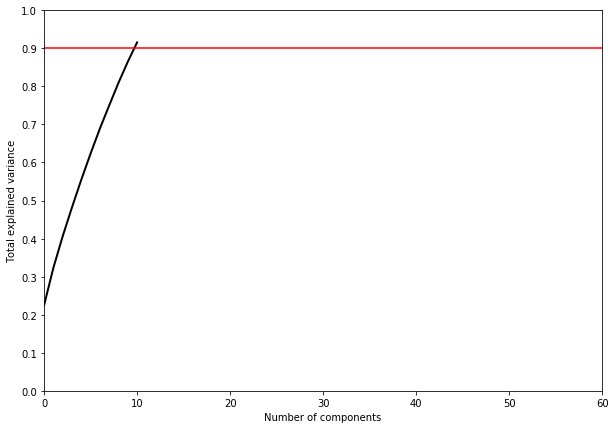

array([0.22483215, 0.32310233, 0.40603824, 0.48199707, 0.55458519,
       0.62342493, 0.68903727, 0.74975106, 0.8094166 , 0.86457305,
       0.91547005])

In [14]:
# pca = decomposition.PCA(n_components = 19, random_state = 42).fit(scaled_client_data)
pca = decomposition.PCA(n_components = 11, random_state = 42).fit(scaled_client_data)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 60)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')
plt.show();
np.cumsum(pca.explained_variance_ratio_)

In [15]:
clients_pca = pca.transform(scaled_client_data)

In [16]:
clients_pca

array([[ 1.9034246 , -0.86962884,  1.63403113, ...,  0.52450296,
        -0.57459605, -0.02942249],
       [ 1.77195762, -0.812079  ,  1.34532325, ..., -0.2192187 ,
         1.50905553,  0.54656957],
       [-0.58786026,  0.06401522,  0.35716046, ..., -0.09042149,
         0.17887665,  0.05804021],
       ...,
       [-0.54704157,  0.02178096,  0.48761305, ..., -0.13670864,
         0.41532597,  0.25591796],
       [-0.79528291,  0.11159278,  0.05671672, ...,  0.08456135,
        -0.01386465, -0.06279649],
       [-0.74868029,  0.09599111,  0.02888053, ...,  0.09123478,
        -0.02492359, -0.01954377]])

In [17]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)

X_tsne = tsne.fit_transform(clients_pca)


CPU times: user 6min 2s, sys: 312 ms, total: 6min 2s
Wall time: 6min 2s


In [18]:
chosen_cols

['Снятие денег',
 'Жилье и бытовые услуги',
 'Еда',
 'Безналичные платежи',
 'Отдых и развлечения',
 'Одежда и обувь',
 'Прочие',
 'Авто',
 'Здоровье',
 'Самолеты. поезда. автобусы',
 'Такси',
 'Дети и учеба',
 'Домашние животные']

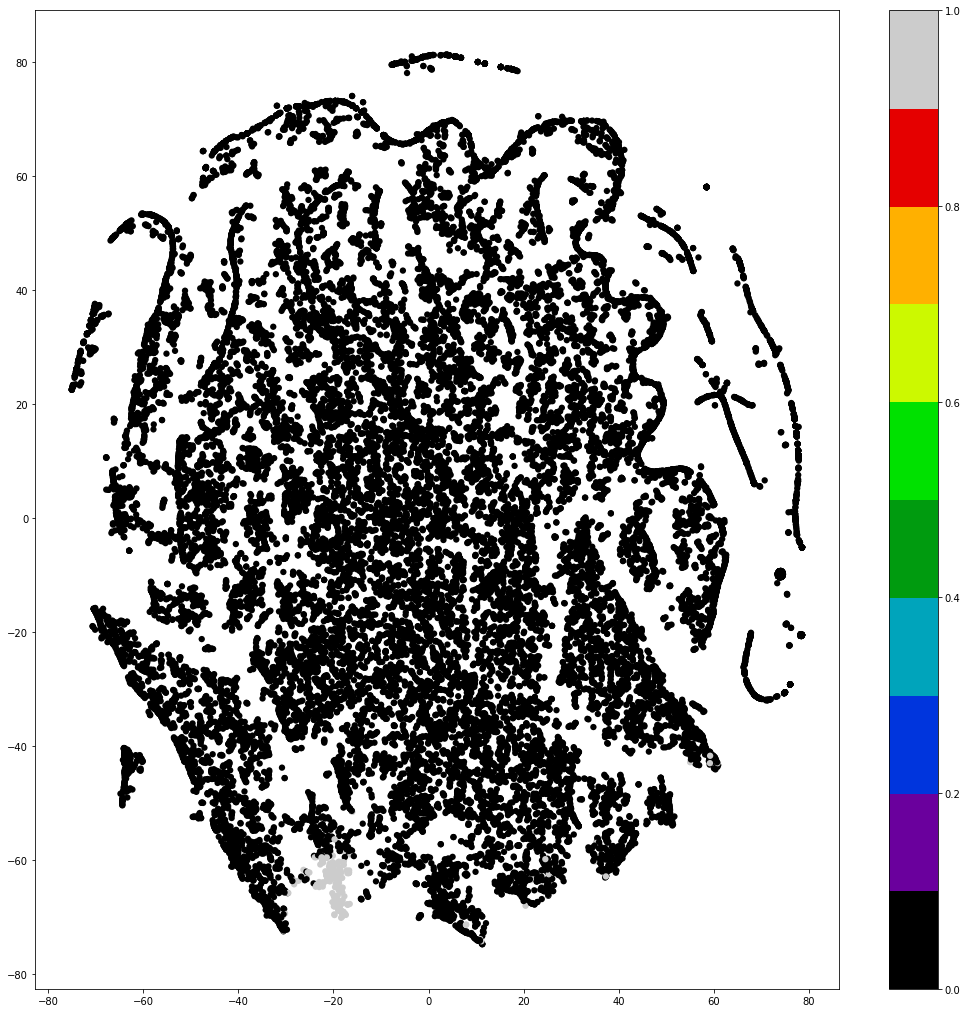

In [19]:
plt.figure(figsize=(18,18))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = result['Самолеты. поезда. автобусы'] > 1000,
            edgecolor='none', s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

In [20]:
# epses = [1, 1.2, 1.5, 1.7, 1.9, 2.1, 2.5, 3.7]
# # min_samples_range = [3, 4, 5, 6, 7]
# epses = [0.5, 0.9, 1.2, 1.5]
# min_samples_range = [7, 10, 15, 23, 33, 50, 80, 300]

# epses = np.linspace(0.3, 2, 25)
# min_samples_range = [i for i in range(4, 33)]
# for eps in epses:
#     for min_samples in min_samples_range:
#         classes = DBSCAN(eps = eps, min_samples = min_samples).fit_predict(X_tsne)
#         num_of_classes = len(np.unique(classes))
#         if (num_of_classes > 100) and (num_of_classes < 200) and (sum(classes == -1) < 4000):
#             plt.figure(figsize=(12,12))
#             plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = classes,
#                         edgecolor='none', s=40,
#                         cmap=plt.cm.get_cmap('nipy_spectral', 10))
#             plt.title(f'EPS: {eps} MIN_SAMPLES: {min_samples} NUM OF CLASSES: {num_of_classes}')
#             plt.show()

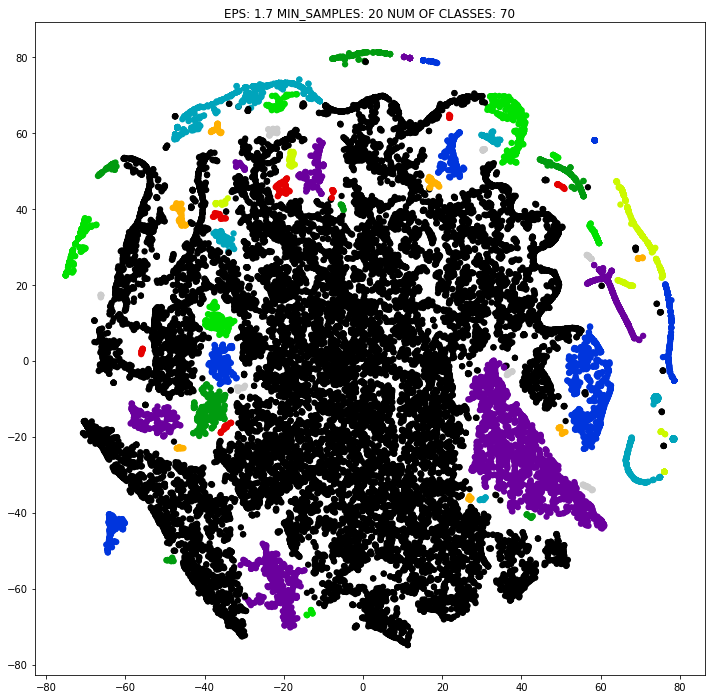

In [21]:
classes = DBSCAN(eps = 1.7, min_samples = 10).fit_predict(X_tsne)
num_of_classes = len(np.unique(classes))
plt.figure(figsize=(12,12))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = classes,
            edgecolor='none', s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title(f'EPS: {1.7} MIN_SAMPLES: {20} NUM OF CLASSES: {num_of_classes}')
plt.show()

In [22]:
pd.DataFrame(X_tsne).to_csv('X_tsne.csv')
pd.DataFrame(classes).to_csv('classes.csv')

In [23]:
len(np.unique(classes))

70

In [24]:
mean_client = np.mean(client_data, axis = 0)

In [25]:
un_classes = np.unique(classes)
top_classes = sorted(un_classes, key = lambda x: sum((classes == x)*1), reverse = True)

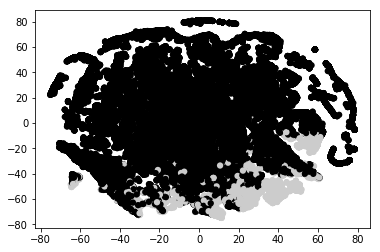

In [26]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = client_data['SUM_AMOUNT'] > 10000,
            edgecolor='none', s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.show()

In [27]:
# plt.figure(figsize=(30, 70))
# fig, axes = plt.subplots(ncols=5, nrows = 10, figsize=(40, 100))
# for i, c in enumerate(top_classes[:50]):
#     class_i = c
#     print (c, ': ',sum((classes == class_i)*1))
#     axes[i//5,i%5].scatter(X_tsne[:, 0], X_tsne[:, 1], c = 1 - (classes == class_i),
#                 edgecolor='none', s=40,
#                 cmap=plt.cm.get_cmap('nipy_spectral', 10))
#     axes[i//5,i%5].set_title(c, fontsize = 17)
# plt.show()

In [28]:
# for k in top_classes: 
#     print ("CLASS NUMBER " + str(k))
#     for i in range(len(client_data.columns)):
#         if 'PERCENTAGE' not in client_data.columns[i]:
#             print (str(client_data.columns[i]).rjust(60), '  ', list(zip(client_data[classes == k].mean(), mean_client))[i])
#     print ('------------')
    

## Next we will visualize our results and will try to interpret group's expenses behavior, find some patterns or peculiarities. 

In [29]:
exp_cols = []
for col in new_expenses.columns.values:
    if ('PERCENTAGE' not in col) and str.upper(col) != col:
        exp_cols.append(col)

In [30]:
exp_cols

['Снятие денег',
 'Жилье и бытовые услуги',
 'Еда',
 'Безналичные платежи',
 'Отдых и развлечения',
 'Одежда и обувь',
 'Прочие',
 'Авто',
 'Здоровье',
 'Самолеты. поезда. автобусы',
 'Такси',
 'Дети и учеба',
 'Домашние животные']

In [31]:
client_data_copy = client_data
client_data = result


In [32]:
exp_cols = sorted(exp_cols, key = lambda x: np.mean(client_data[exp_cols], axis = 0)[x], reverse = True)

In [33]:
expenses = np.mean(client_data[exp_cols], axis = 0)

In [34]:
def checker(cols):
    new_cols =[]
    for col in cols:
        if 'SUM_AMOUNT_IF_' in col:
            col = col[14:]
        if 'cloth' in col:
            col = 'clothes'
        new_cols.append(col)
    return new_cols

In [35]:
def build_exp_pie(expenses = expenses):
    temp = expenses
    labels = checker(temp.index)
    sizes = (temp / temp.sum())*100
    trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
    layout = go.Layout(title='Распределение трат')
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [36]:
labels_exp = checker(np.mean(client_data[exp_cols], axis = 0).index)

In [37]:
def plot_expenses(class_i = 0, exp_cols = exp_cols):
    exp_cols_copy = exp_cols
    def temp_plot(start, end, exp_cols = exp_cols_copy):
        plt.figure(figsize = (12,2))
        labels_exp = checker(np.mean(client_data[exp_cols], axis = 0).index)
        exp_cols = exp_cols[start:end]
        plt.bar(np.arange(len(exp_cols)) * 3, np.mean(client_data[exp_cols], axis = 0), width = 1.1)
        plt.bar(np.arange(len(exp_cols)) * 3 + 1.1, np.mean(client_data[classes == class_i][exp_cols], axis = 0), width = 1.1)
        plt.xticks(np.arange(len(exp_cols)) * 3, checker(np.mean(client_data[exp_cols], axis = 0).index), fontsize = 9, rotation = 40)
        plt.legend(['Средний Клиент', 'Портрет человека в группе'], fontsize = 12)
        plt.show()
    temp_plot(0, 6)
    temp_plot(6, len(exp_cols_copy))    

In [38]:
np.mean(result[classes == top_classes[5]]['IS_RESIDENT'])

0.9640591966173362

In [ ]:
# for i in range(10):
#     plot_expenses(top_classes[i])

In [40]:
def checker_reg(cols):
    mapka = {'MEAN_AMOUNT': 'Средний Чек',
            'SUM_AMOUNT': 'Сумма Всех Транзакций',
            "SUM_AMOUNT_BLR": 'Сумма потраченных денег в Беларуси',
            'SUM_AMOUNT_FOREIGN': 'Сумма потраченных денег за границей',
            'NUM_TRANS': 'Количество транзакий',
            'MAX_CARD_LVL': "Максимальный уровень карточки (от 1 до 7)",
            'NUM_COUNTRIES': 'Количество стран, в которых были совершены транзакции'}
    cols_new = list(map(lambda x: mapka[x], cols))
    return cols_new

In [58]:
def show_comparison(class_i):
    def temp_show(to_compare, figsize = (10, 4), class_i = class_i):
        exp_cols = to_compare
        mean_client = np.mean(client_data, axis = 0)
        our_client = np.mean(client_data[classes == 1], axis = 0)

        plt.figure(figsize = figsize)
        labels_exp = checker_reg(to_compare)
        exp_cols_copy = exp_cols
        plt.barh(np.arange(len(exp_cols)) * 3, np.mean(client_data[exp_cols], axis = 0), height = 1.1)
        plt.barh(np.arange(len(exp_cols)) * 3 + 1.1, np.mean(client_data[classes == class_i][exp_cols], axis = 0), height = 1.1)
        plt.yticks(np.arange(len(exp_cols)) * 3, labels_exp, fontsize = 11, rotation = 0)
        plt.legend(['Средний клиент', 'Портрет Клиента в группе'], fontsize = 8)
        plt.show()
    to_compare = ['MEAN_AMOUNT', 'SUM_AMOUNT', 'SUM_AMOUNT_BLR', 'SUM_AMOUNT_FOREIGN', 'NUM_TRANS'][::-1]
    temp_show(to_compare)
    to_compare = ['MAX_CARD_LVL', 'NUM_COUNTRIES'][::-1]
    temp_show(to_compare, (8, 2))

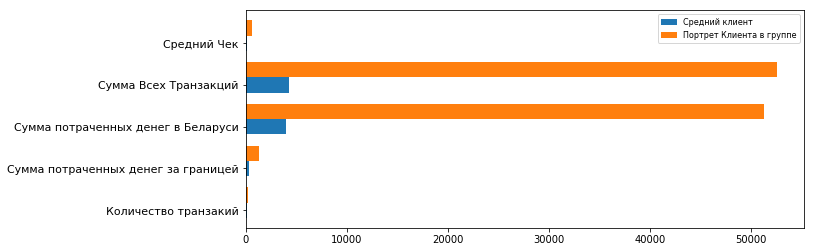

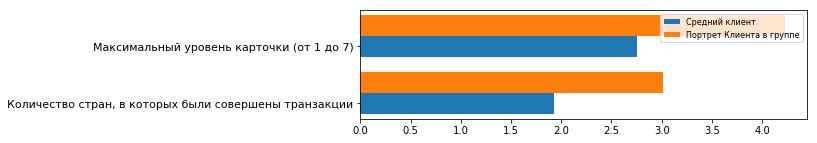

In [60]:
show_comparison(1)

In [68]:
def show_gender(class_i):
    labels = ['MALE', 'FEMALE']
    sizes = [np.mean(client_data[classes == class_i], axis = 0)['GENDER'] * 100, 0]
    sizes[1] = 100-sizes[0]
    trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
    layout = go.Layout(title='Соотношение полов в группе', font = ({'size': 12}))
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [69]:
show_gender(1)


In [76]:
def show_client_info(class_i):
    print (f'ГРУППА НОМЕР {class_i}')
    print ('СРЕДНИЙ ВОЗРАСТ: ', np.mean(client_data[classes == class_i], axis = 0)['AGE'])
    print ('КОЛИЧЕСТВО ЧЕЛОВЕК В ГРУППЕ: ', sum((classes == class_i)*1))
    plt.figure(figsize=(8,8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = 1 - (classes == class_i),
            edgecolor='none', s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.show()
    show_gender(class_i)
    plot_expenses(class_i)
    show_comparison(class_i)
    print ('-------------------------------------------------------------------')

ГРУППА НОМЕР 3
СРЕДНИЙ ВОЗРАСТ:  37.517812265370154
КОЛИЧЕСТВО ЧЕЛОВЕК В ГРУППЕ:  20089


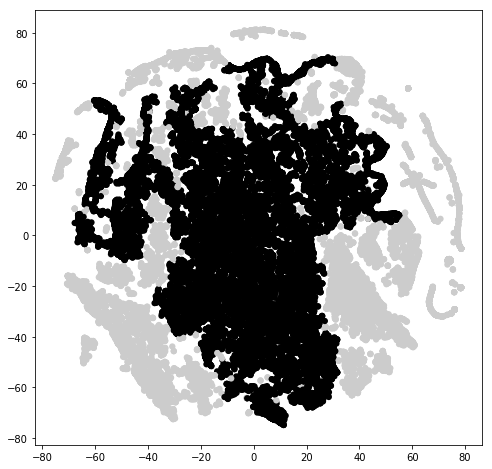

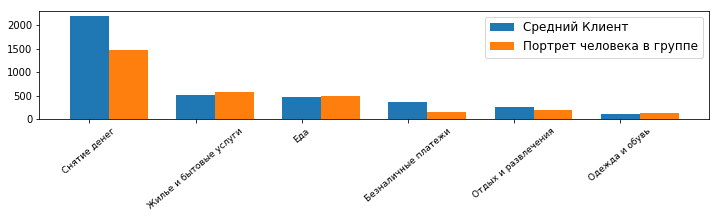

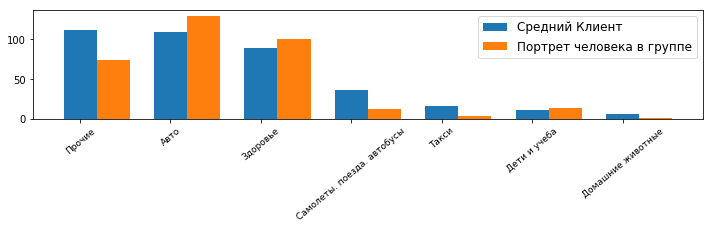

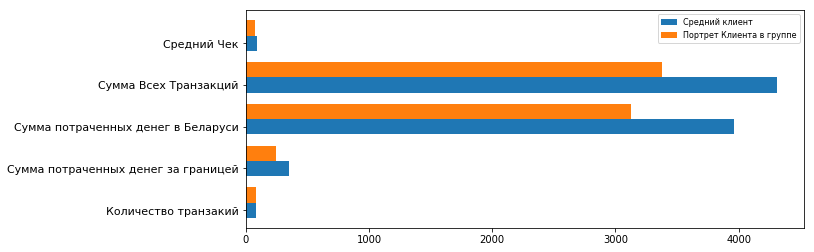

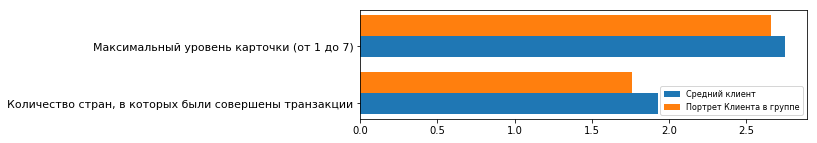

-------------------------------------------------------------------
ГРУППА НОМЕР 5
СРЕДНИЙ ВОЗРАСТ:  30.29491062927992
КОЛИЧЕСТВО ЧЕЛОВЕК В ГРУППЕ:  1988


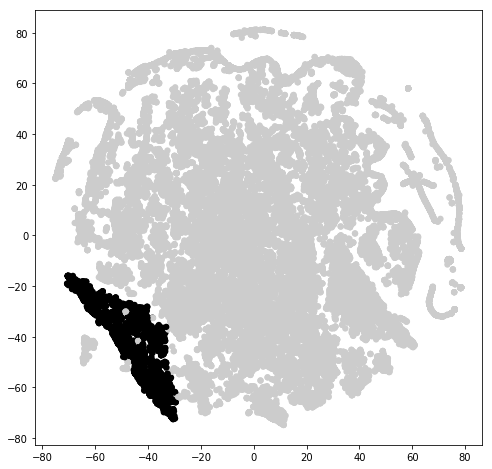

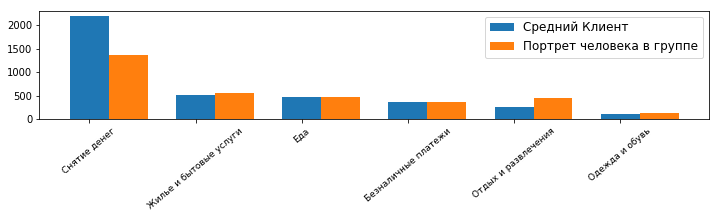

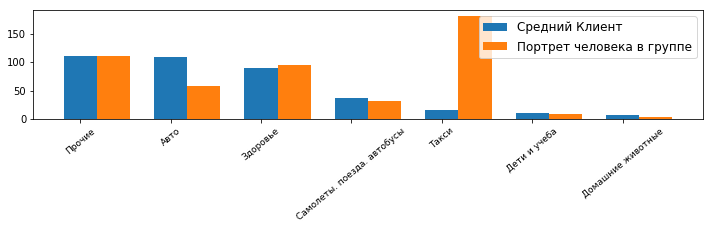

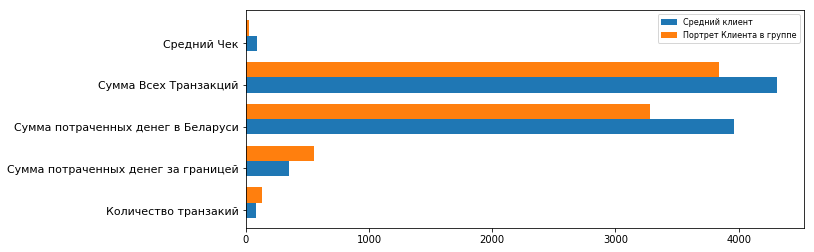

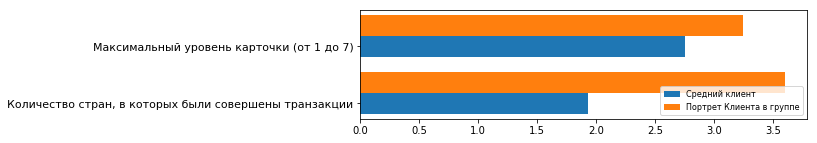

-------------------------------------------------------------------
ГРУППА НОМЕР 6
СРЕДНИЙ ВОЗРАСТ:  36.80922676273776
КОЛИЧЕСТВО ЧЕЛОВЕК В ГРУППЕ:  1780


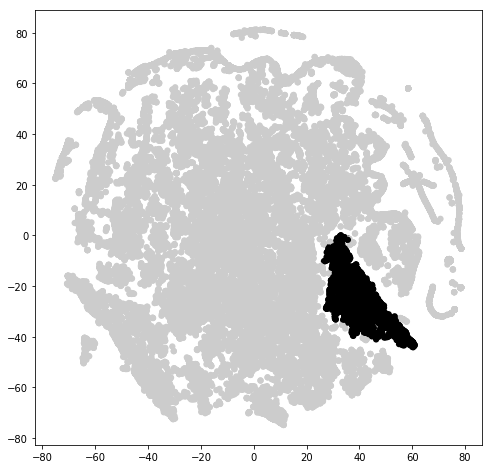

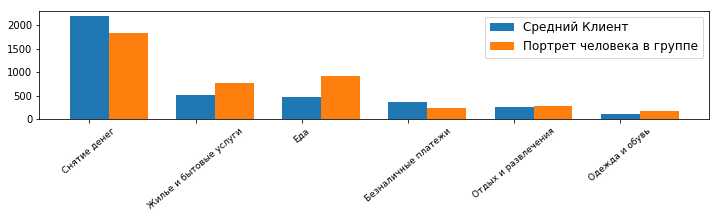

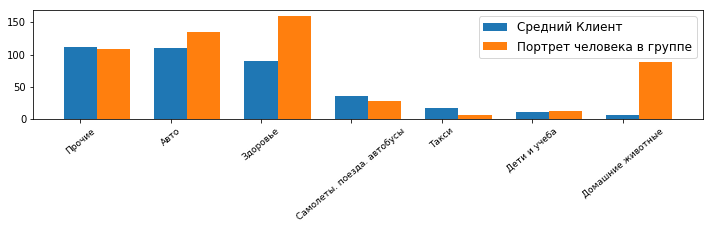

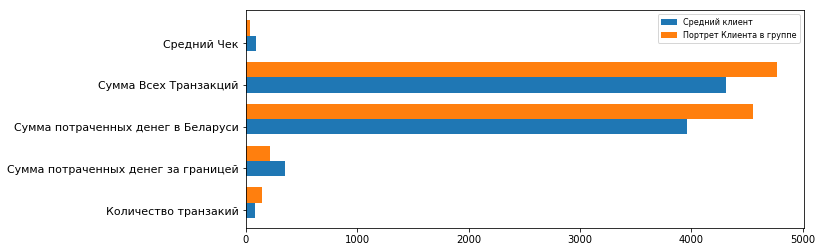

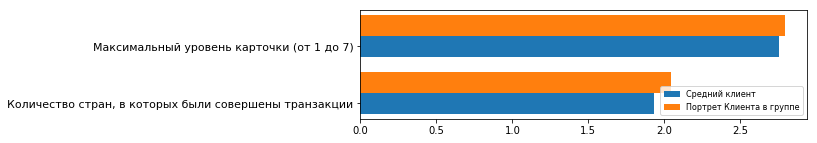

-------------------------------------------------------------------
ГРУППА НОМЕР 15
СРЕДНИЙ ВОЗРАСТ:  40.969229478986406
КОЛИЧЕСТВО ЧЕЛОВЕК В ГРУППЕ:  695


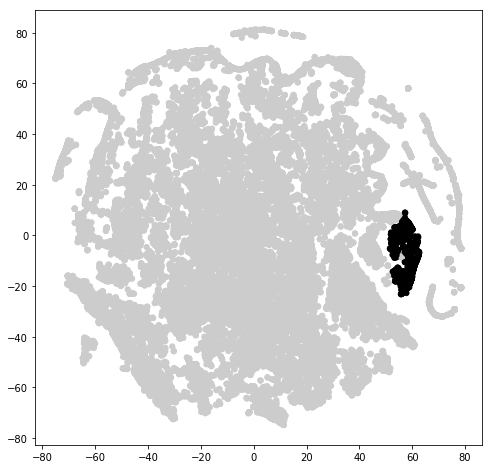

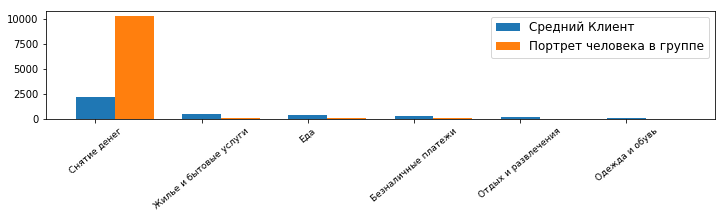

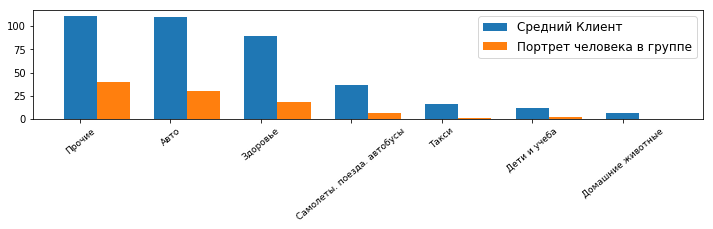

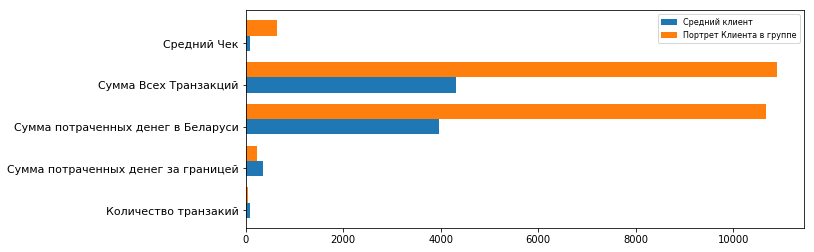

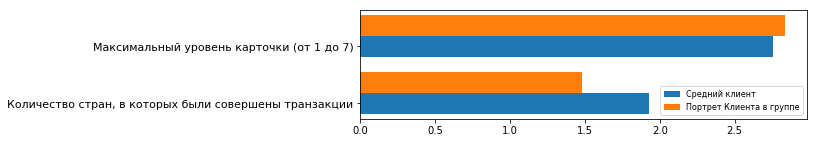

-------------------------------------------------------------------
ГРУППА НОМЕР 26
СРЕДНИЙ ВОЗРАСТ:  37.9794741697417
КОЛИЧЕСТВО ЧЕЛОВЕК В ГРУППЕ:  542


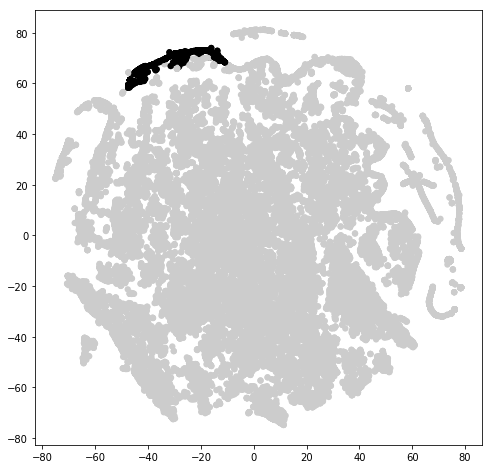

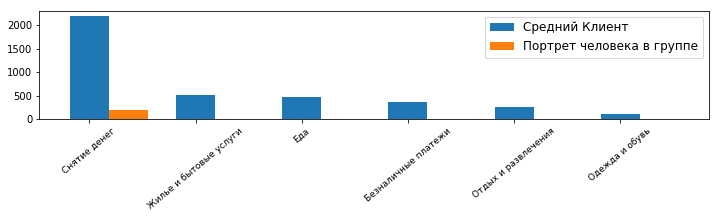

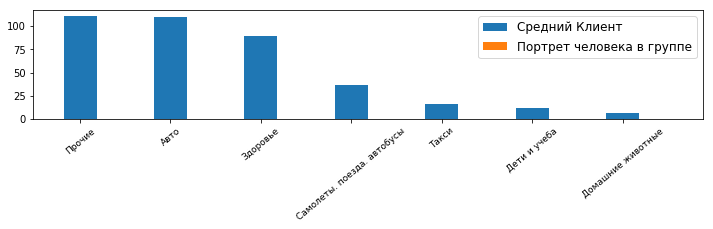

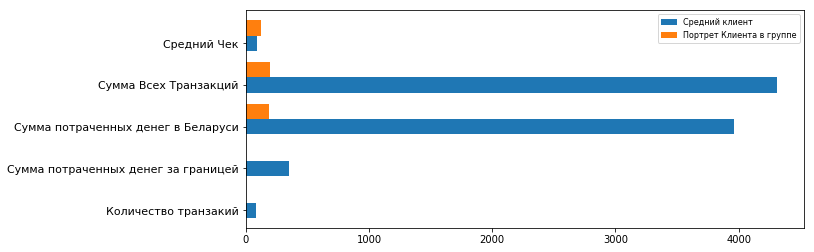

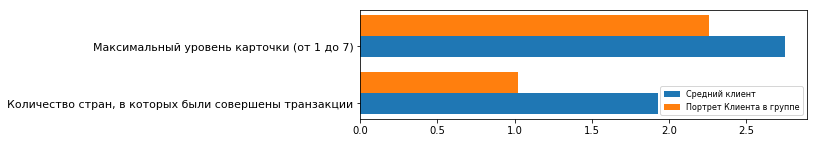

-------------------------------------------------------------------
ГРУППА НОМЕР 7
СРЕДНИЙ ВОЗРАСТ:  37.36258723818818
КОЛИЧЕСТВО ЧЕЛОВЕК В ГРУППЕ:  473


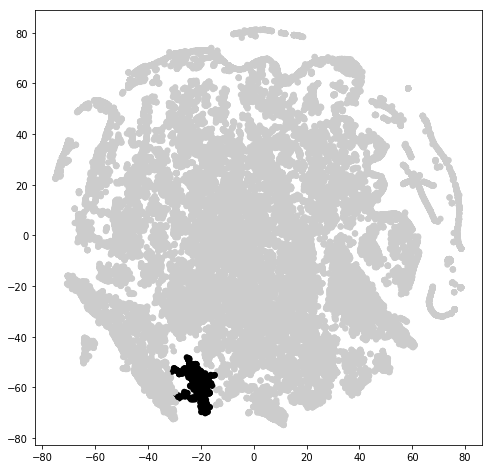

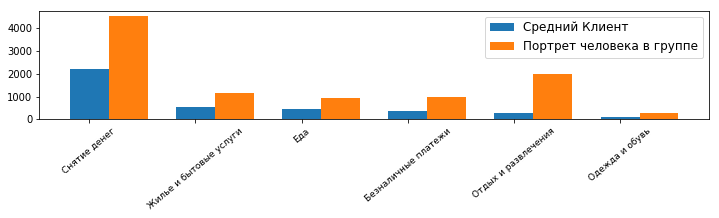

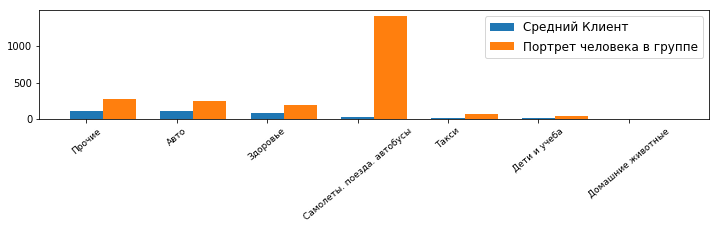

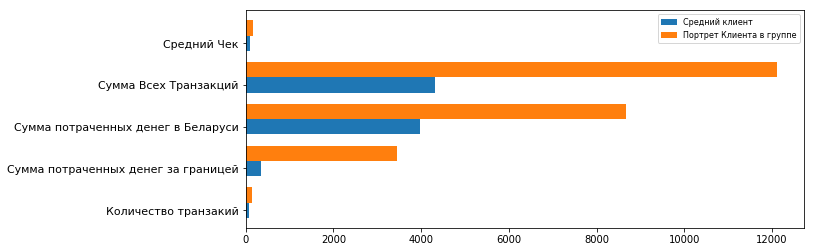

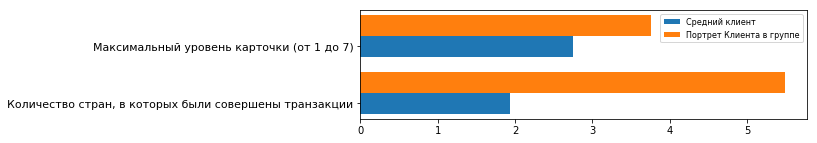

-------------------------------------------------------------------
ГРУППА НОМЕР 1
СРЕДНИЙ ВОЗРАСТ:  40.226743870278725
КОЛИЧЕСТВО ЧЕЛОВЕК В ГРУППЕ:  392


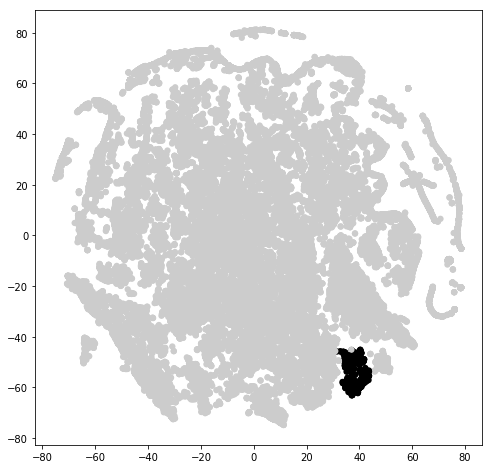

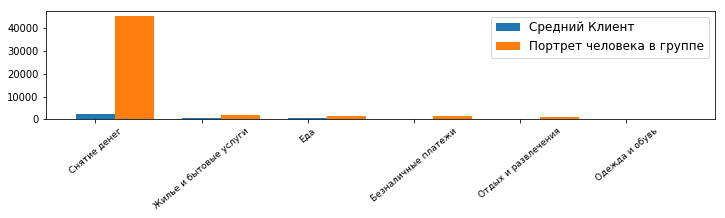

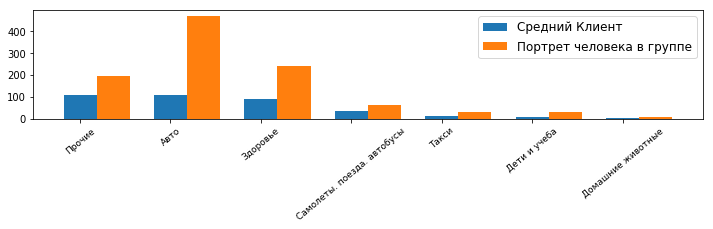

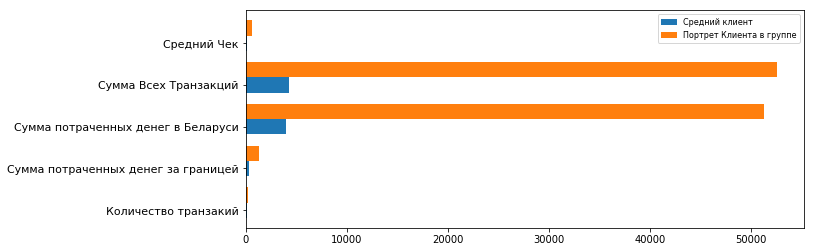

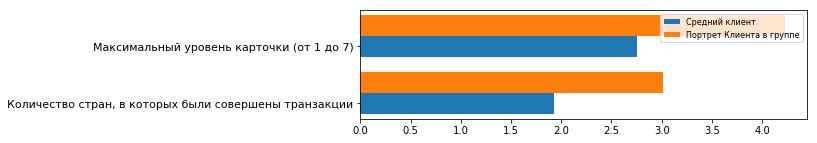

-------------------------------------------------------------------
ГРУППА НОМЕР -1
СРЕДНИЙ ВОЗРАСТ:  35.71698475817681
КОЛИЧЕСТВО ЧЕЛОВЕК В ГРУППЕ:  350


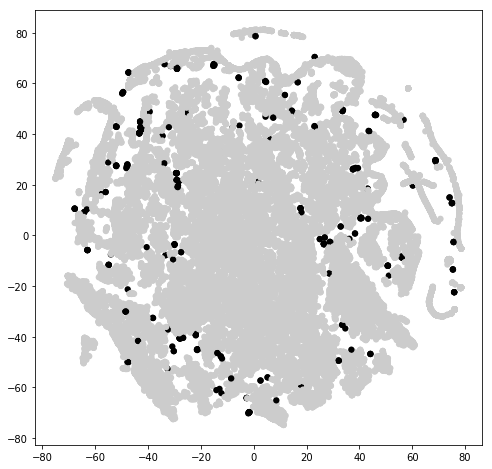

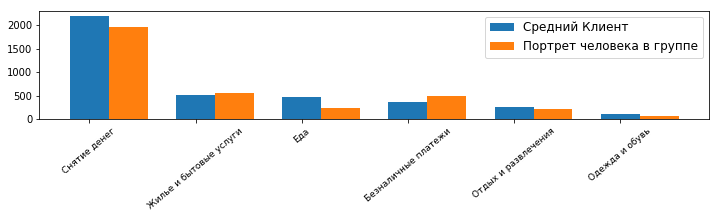

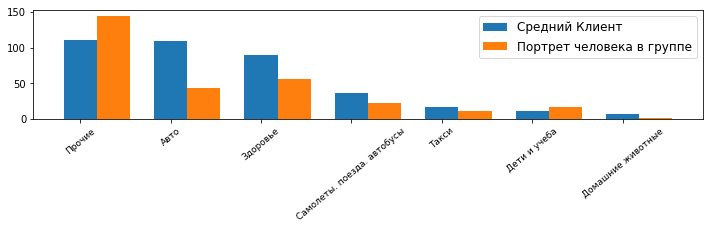

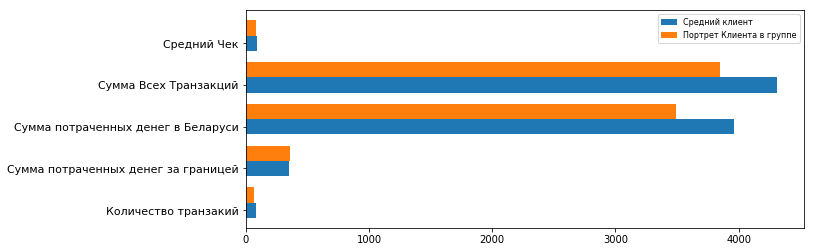

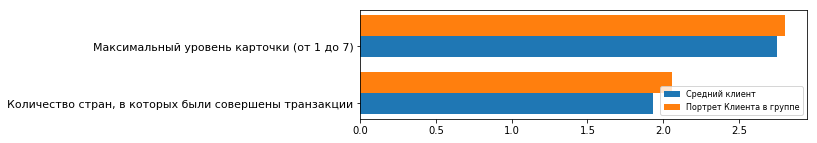

-------------------------------------------------------------------
ГРУППА НОМЕР 34
СРЕДНИЙ ВОЗРАСТ:  43.002994239033086
КОЛИЧЕСТВО ЧЕЛОВЕК В ГРУППЕ:  344


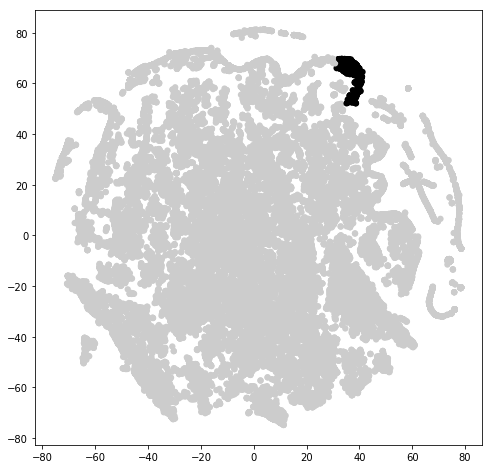

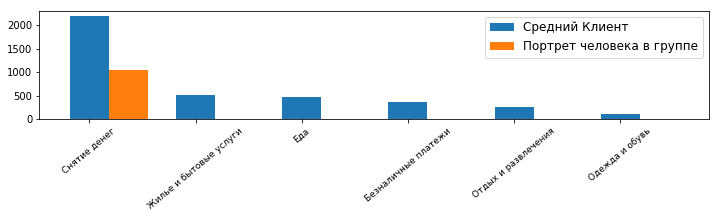

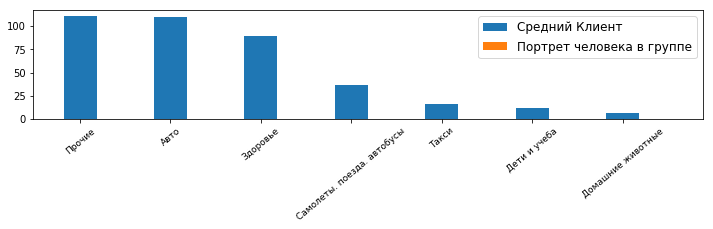

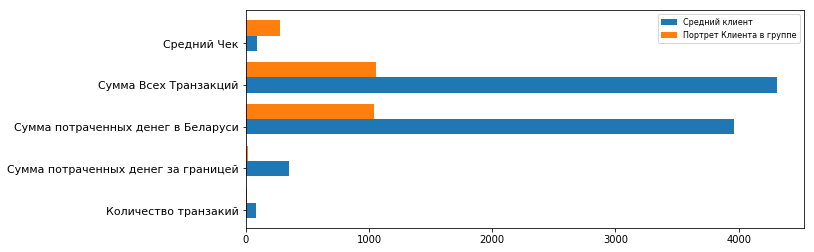

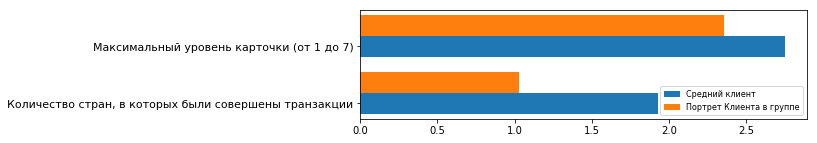

-------------------------------------------------------------------
ГРУППА НОМЕР 4
СРЕДНИЙ ВОЗРАСТ:  34.542525687441156
КОЛИЧЕСТВО ЧЕЛОВЕК В ГРУППЕ:  308


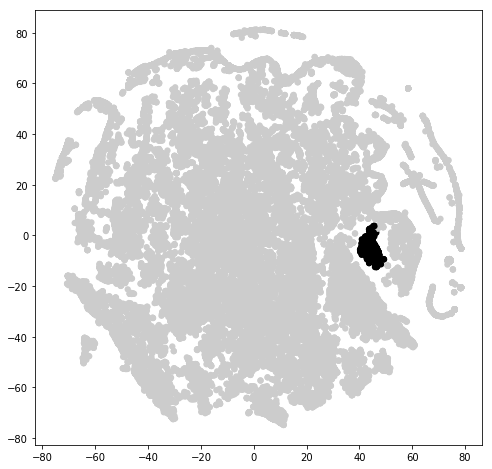

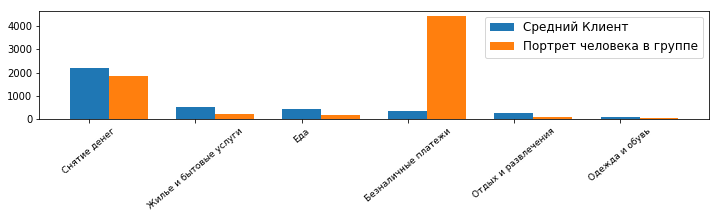

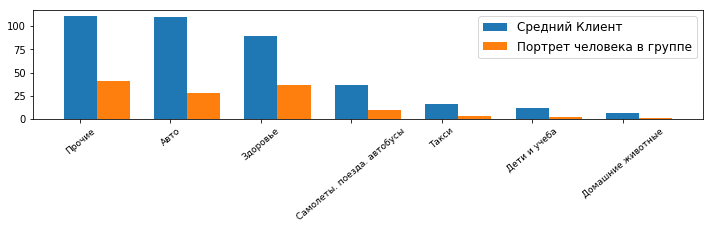

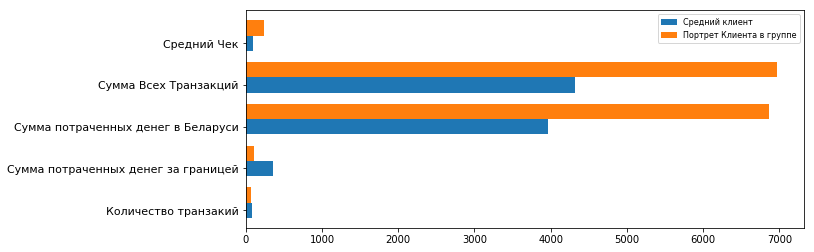

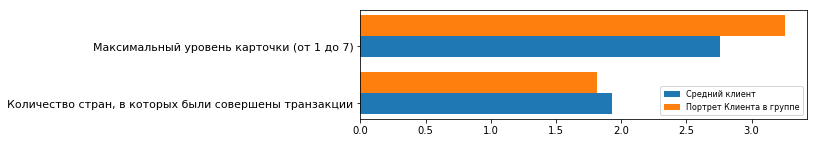

-------------------------------------------------------------------


In [77]:
for i in range(10):
    show_client_info(top_classes[i])